In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Project Details
## In this file tasks are:
- Find top selling Publishers of all time
- Find out what games are they mostly selling

# 1. Find top selling Publishers of all time

In [2]:
# import data
games = pd.read_csv('vgsales_cleared.csv', index_col='Name')
# making copy on which will be working moving forward
games_copy = games.copy()

In [3]:
# finding top selling developers based on Global Sales
top_developers = games_copy.pivot_table(index='Publisher', values='Global_Sales', aggfunc='sum').sort_values(by='Global_Sales', ascending=False)
top10_developers = top_developers.head(10)

Text(0, 0.5, 'Copies sold (in milions)')

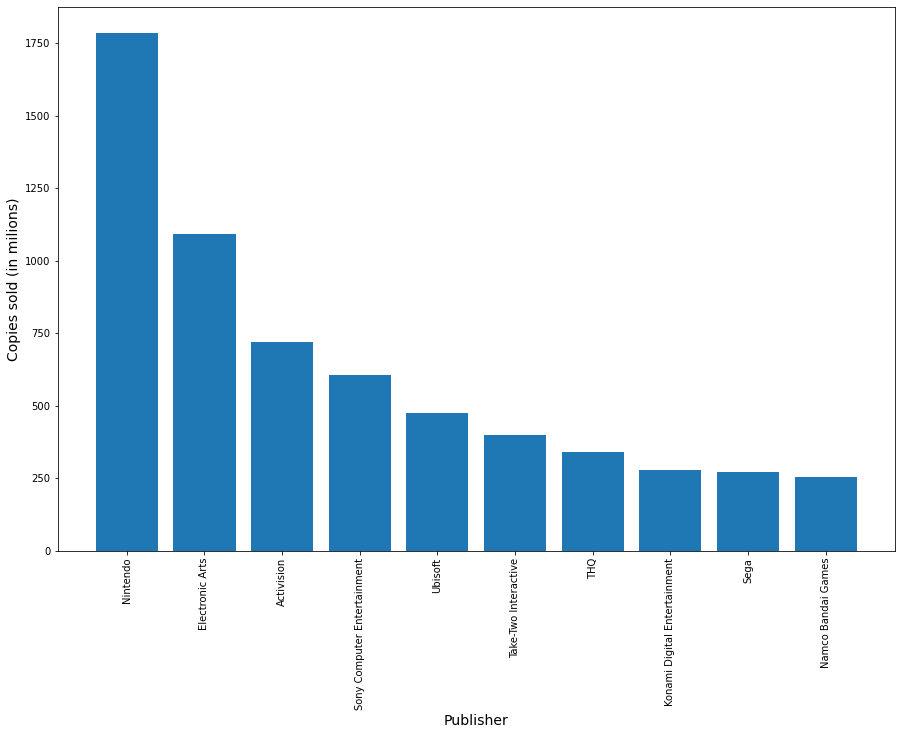

In [4]:
# creating chart 
plt.figure(figsize=(15,10))
plt.bar(top10_developers.index, top10_developers.Global_Sales)
plt.xticks(rotation=90)
plt.xlabel('Publisher', fontsize=14)
plt.ylabel('Copies sold (in milions)', fontsize = 14)

As we can see, Nintendo is way above competition. However, in spite of recent events (when creting this notebook, recently Microsoft bought Activion). Let's see how will it change the chart.

In [5]:
# to do so we need to find microsoft as it did not make to top 10, it is not named just Microsoft so we will use string operations to find it 
microsoft = top_developers.loc[top_developers.index.str.contains('Microsoft')]
microsoft

,Global_Sales
Publisher,
Microsoft Game Studios,245.78


In [6]:
top10_developers = top10_developers.append(microsoft)
top10_developers

,Global_Sales
Publisher,
Nintendo,1784.47
Electronic Arts,1093.39
Activision,721.41
Sony Computer Entertainment,607.28
Ubisoft,473.54
Take-Two Interactive,399.31
THQ,340.44
Konami Digital Entertainment,278.56
Sega,270.70


In [7]:
top10_developers.drop_duplicates(inplace=True)

In [8]:
top10_developers.Global_Sales.loc[top10_developers.index == 'Activision'] = top10_developers.Global_Sales.loc[top10_developers.index == 'Activision'] + top10_developers.Global_Sales.loc[top10_developers.index == 'Microsoft Game Studios'].sum()
top10_developers

,Global_Sales
Publisher,
Nintendo,1784.47
Electronic Arts,1093.39
Activision,967.19
Sony Computer Entertainment,607.28
Ubisoft,473.54
Take-Two Interactive,399.31
THQ,340.44
Konami Digital Entertainment,278.56
Sega,270.70


now we have Global Sales of Microsoft and Activison. Now we only have to rename Activision and remove old Microsoft Game Studios

In [9]:
top10_developers.drop('Microsoft Game Studios', inplace=True)
top10_developers

,Global_Sales
Publisher,
Nintendo,1784.47
Electronic Arts,1093.39
Activision,967.19
Sony Computer Entertainment,607.28
Ubisoft,473.54
Take-Two Interactive,399.31
THQ,340.44
Konami Digital Entertainment,278.56
Sega,270.70


In [10]:
top10_developers.rename({'Activision' : "Microsoft Game Studios"}, inplace=True)
top10_developers

,Global_Sales
Publisher,
Nintendo,1784.47
Electronic Arts,1093.39
Microsoft Game Studios,967.19
Sony Computer Entertainment,607.28
Ubisoft,473.54
Take-Two Interactive,399.31
THQ,340.44
Konami Digital Entertainment,278.56
Sega,270.70


Text(0, 0.5, 'Copies sold (in milions)')

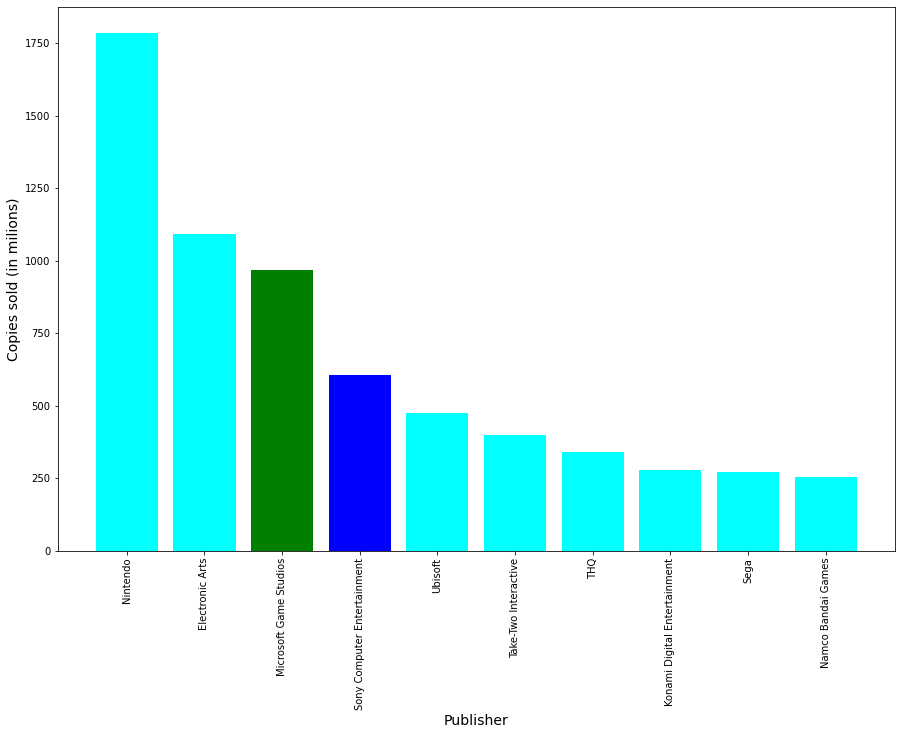

In [11]:
# creating another chart 
plt.figure(figsize=(15,10))
plt.bar(top10_developers.index, top10_developers.Global_Sales, color= ['cyan', 'cyan', 'green', 'blue', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan'])
plt.xticks(rotation=90)
plt.xlabel('Publisher', fontsize=14)
plt.ylabel('Copies sold (in milions)', fontsize = 14)

Acording to this data, Microsft did beat his rival - Sony with sold coppies. Sony has something to worry about now!

# 2. Find out what games are they mostly selling

First thing we have to merge Activions and Microsoft in main data frame

In [12]:
# changing Publisher from activision to microsoft
games_copy.Publisher.loc[games_copy.Publisher == 'Activision'] = 'Microsoft Game Studios'

C:\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [13]:
# checking if worked 
games_copy.loc[games_copy.index.str.contains('Call of Duty')].head()

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Name,,,,,,,,,,
Call of Duty: Modern Warfare 3,30,X360,2011,Shooter,Microsoft Game Studios,9.03,4.28,0.13,1.32,14.76
Call of Duty: Black Ops,32,X360,2010,Shooter,Microsoft Game Studios,9.67,3.73,0.11,1.13,14.64
Call of Duty: Black Ops 3,34,PS4,2015,Shooter,Microsoft Game Studios,5.77,5.81,0.35,2.31,14.24
Call of Duty: Black Ops II,35,PS3,2012,Shooter,Microsoft Game Studios,4.99,5.88,0.65,2.52,14.03
Call of Duty: Black Ops II,36,X360,2012,Shooter,Microsoft Game Studios,8.25,4.30,0.07,1.12,13.73


In [14]:
# creating pivot table with data about genres from each publisher
genre = games_copy.pivot_table(index='Publisher', columns='Genre', values='Global_Sales', aggfunc='sum')

In [15]:
genre = genre.loc[top10_developers.index]

<AxesSubplot:xlabel='Publisher'>

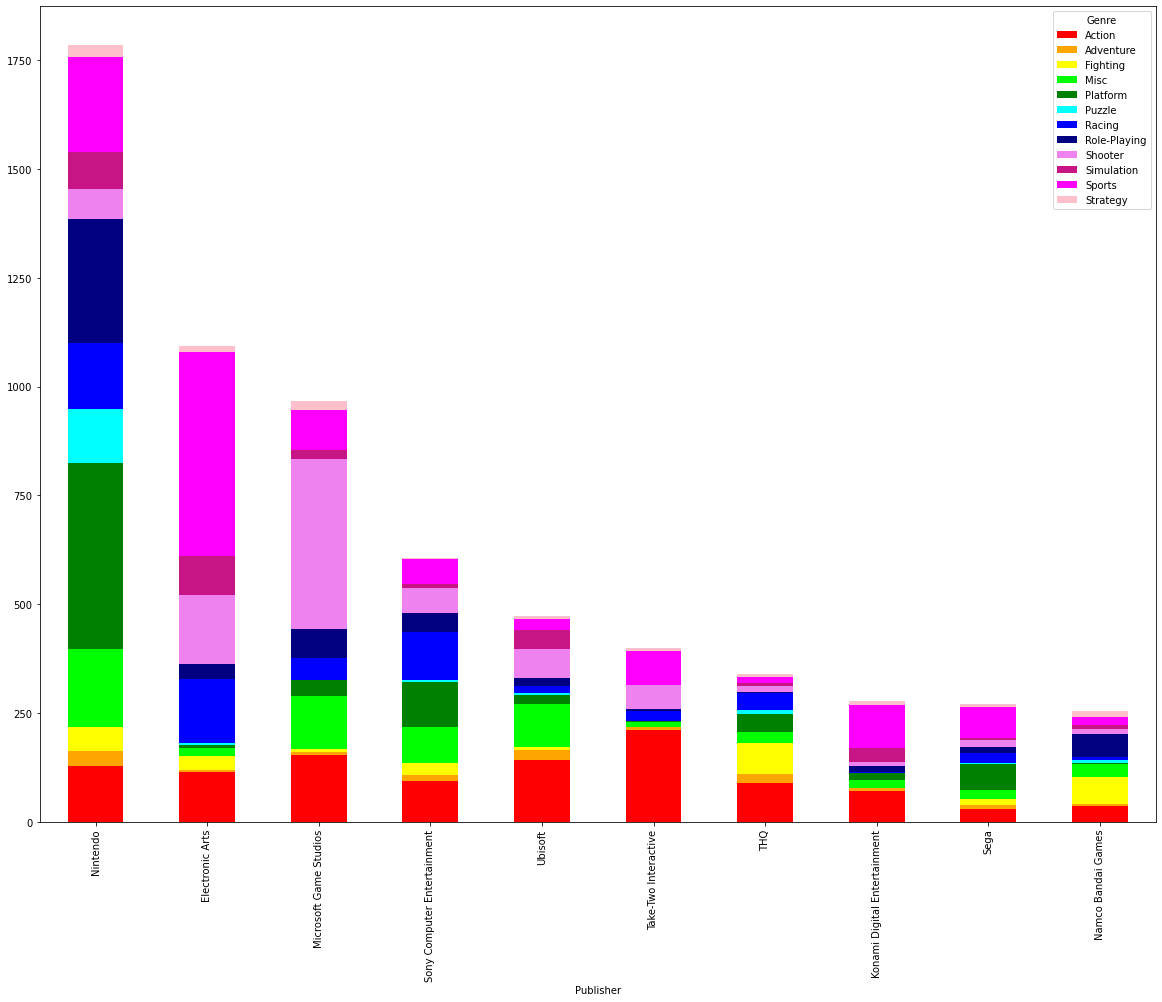

In [16]:
# creating chart
genre.plot(kind='bar', stacked= True, figsize=(20,15), color=['red', 'orange', 'yellow', 'lime', 'green', 
                                                              'aqua', 'blue', 'navy', 'violet', 'mediumvioletred',
                                                             'magenta', 'pink'])



